# Análise Exploratória de Dados (EDA) - Hemograma

**Objetivo:** Explorar e compreender os dados de hemograma antes de aplicar modelos de Machine Learning.

**Tópicos deste notebook:**
1. Carregamento e inspeção inicial dos dados
2. Análise de valores faltantes
3. Estatísticas descritivas
4. Distribuição das variáveis
5. Comparação com valores de referência clínicos
6. Análise de correlações
7. Identificação de outliers iniciais
8. Principais insights e conclusões

## 1. Importação de Bibliotecas

In [ ]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configurações
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Configuração de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

# Importar funções do nosso projeto
import sys
sys.path.append('../src')
from utils import (
    configurar_visualizacao,
    valores_referencia_hemograma,
    imprimir_resumo_dataset,
    plotar_distribuicao_com_referencia
)

# Configurar visualizações
configurar_visualizacao()

print(" Bibliotecas importadas com sucesso!")

✓ Bibliotecas importadas com sucesso!


## 2. Carregamento dos Dados

In [ ]:
# Carregar dataset
df = pd.read_csv('../data/processed/cbc_limpo.csv')

print(" Dataset carregado com sucesso!\n")
imprimir_resumo_dataset(df)

✓ Dataset carregado com sucesso!

📊 RESUMO DO DATASET

🔢 Dimensões: 424 linhas × 21 colunas

📋 Colunas: ID, WBC, LYMp, MIDp, NEUTp, LYMn, MIDn, NEUTn, RBC, HGB, HCT, MCV, MCH, MCHC, RDWSD, RDWCV, PLT, MPV, PDW, PCT, PLCR

💾 Uso de memória: 0.07 MB

❓ Valores faltantes:
   ✓ Nenhum valor faltante!



In [ ]:
# Visualizar primeiras linhas
print(" Primeiras 10 linhas do dataset:\n")
df.head(10)

🔍 Primeiras 10 linhas do dataset:



,ID,WBC,LYMp,MIDp,NEUTp,LYMn,MIDn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,RDWSD,RDWCV,PLT,MPV,PDW,PCT,PLCR
0,1,10000.0,43.2,6.7,50.1,4.3,0.7,5.0,2.77,7.3,24.2,87.7,26.3,30.1,35.3,11.4,189000.0,9.2,12.5,0.17,22.3
1,3,7200.0,30.7,8.6,60.7,2.2,0.6,4.4,3.97,9.0,30.5,77.0,22.6,29.5,37.2,13.7,148000.0,10.1,14.3,0.14,30.5
2,4,6000.0,30.2,6.3,63.5,1.8,0.4,3.8,4.22,5.9,32.8,77.9,23.2,29.8,46.5,17.0,143000.0,8.6,11.3,0.12,16.4
3,7,16700.0,19.1,12.7,68.2,3.2,2.1,11.4,5.15,14.2,44.8,87.1,27.5,31.6,39.0,12.7,151000.0,9.7,12.8,0.14,26.6
4,8,9300.0,27.4,8.6,64.0,2.6,0.8,5.9,4.39,12.0,37.9,86.4,27.3,31.6,37.2,12.2,194000.0,10.2,15.9,0.19,31.1
5,9,5200.0,19.7,7.9,72.4,1.0,0.4,3.8,4.85,13.2,41.0,84.7,27.2,32.1,35.3,11.8,181000.0,8.7,10.0,0.15,15.9
6,10,10500.0,12.4,8.6,79.0,1.3,0.9,8.3,4.57,12.4,38.9,85.3,27.1,31.8,37.2,12.4,164000.0,8.6,11.3,0.14,16.7
7,11,5600.0,35.6,7.5,56.9,2.0,0.4,3.2,4.31,11.0,36.3,84.3,25.5,30.3,38.0,13.2,171000.0,9.1,13.1,0.15,21.8
8,12,8600.0,41.4,8.3,50.3,3.6,0.7,4.3,4.28,11.0,35.0,81.9,25.7,31.4,37.2,12.9,88000.0,10.9,17.2,0.09,39.2
9,13,5100.0,31.3,8.1,60.6,1.6,0.4,3.1,5.63,14.6,45.6,81.0,25.9,32.0,35.3,12.4,185000.0,8.9,11.3,0.16,18.2


In [4]:
# Informações sobre tipos de dados
print("📋 Informações sobre as colunas:\n")
df.info()

📋 Informações sobre as colunas:

<class 'pandas.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      424 non-null    int64  
 1   WBC     424 non-null    float64
 2   LYMp    424 non-null    float64
 3   MIDp    424 non-null    float64
 4   NEUTp   424 non-null    float64
 5   LYMn    424 non-null    float64
 6   MIDn    424 non-null    float64
 7   NEUTn   424 non-null    float64
 8   RBC     424 non-null    float64
 9   HGB     424 non-null    float64
 10  HCT     424 non-null    float64
 11  MCV     424 non-null    float64
 12  MCH     424 non-null    float64
 13  MCHC    424 non-null    float64
 14  RDWSD   424 non-null    float64
 15  RDWCV   424 non-null    float64
 16  PLT     424 non-null    float64
 17  MPV     424 non-null    float64
 18  PDW     424 non-null    float64
 19  PCT     424 non-null    float64
 20  PLCR    424 non-null    float64
dtypes: float64(20), i

## 3. Análise de Valores Faltantes

In [ ]:
# Contar valores faltantes
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Valores Faltantes': missing,
    'Porcentagem (%)': missing_pct
}).sort_values('Valores Faltantes', ascending=False)

print(" Análise de Valores Faltantes:\n")
print(missing_df[missing_df['Valores Faltantes'] > 0])

if missing.sum() == 0:
    print("\n Excelente! Nenhum valor faltante encontrado!")
else:
    print(f"\n Total de valores faltantes: {missing.sum():,}")

❓ Análise de Valores Faltantes:

Empty DataFrame
Columns: [Valores Faltantes, Porcentagem (%)]
Index: []

✅ Excelente! Nenhum valor faltante encontrado!


In [7]:
# Visualizar valores faltantes
if missing.sum() > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    missing_df[missing_df['Valores Faltantes'] > 0]['Porcentagem (%)'].plot(
        kind='barh', ax=ax, color='coral'
    )
    ax.set_xlabel('Porcentagem de Valores Faltantes (%)')
    ax.set_title('Valores Faltantes por Coluna')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## 4. Estatísticas Descritivas

Vamos analisar as principais métricas estatísticas de cada variável numérica.

In [6]:
# Selecionar apenas colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"📊 Colunas numéricas encontradas: {len(numeric_cols)}\n")
print("Colunas:", ', '.join(numeric_cols))

📊 Colunas numéricas encontradas: 21

Colunas: ID, WBC, LYMp, MIDp, NEUTp, LYMn, MIDn, NEUTn, RBC, HGB, HCT, MCV, MCH, MCHC, RDWSD, RDWCV, PLT, MPV, PDW, PCT, PLCR


In [ ]:
# Estatísticas descritivas
stats = df[numeric_cols].describe().T
stats['missing'] = df[numeric_cols].isnull().sum()
stats['missing_pct'] = (stats['missing'] / len(df)) * 100

print(" Estatísticas Descritivas Completas:\n")
stats.round(2)

📈 Estatísticas Descritivas Completas:



,count,mean,std,min,25%,50%,75%,max,missing,missing_pct
ID,424.0,248.16,143.93,1.00,121.75,246.00,372.25,500.00,0,0.0
WBC,424.0,7185.38,2913.26,2400.00,5200.00,6700.00,8600.00,17100.00,0,0.0
LYMp,424.0,25.36,10.43,6.90,17.30,24.65,31.30,89.80,0,0.0
MIDp,424.0,8.33,5.15,0.50,6.90,7.90,8.80,69.00,0,0.0
NEUTp,424.0,80.50,256.79,9.70,60.60,67.20,74.05,5317.00,0,0.0
LYMn,424.0,1.78,1.20,0.20,1.10,1.60,2.10,14.00,0,0.0
MIDn,424.0,0.60,0.51,0.10,0.40,0.50,0.70,7.00,0,0.0
NEUTn,424.0,5.11,4.74,1.20,3.20,4.40,5.90,79.00,0,0.0
RBC,424.0,4.56,0.62,2.55,4.24,4.57,5.00,5.77,0,0.0
HGB,424.0,11.78,2.01,5.90,10.48,11.70,13.20,15.90,0,0.0


## 5. Distribuição das Variáveis

Vamos visualizar a distribuição de cada marcador do hemograma.

✓ Gráfico salvo: reports/figures/01_distribuicoes.png


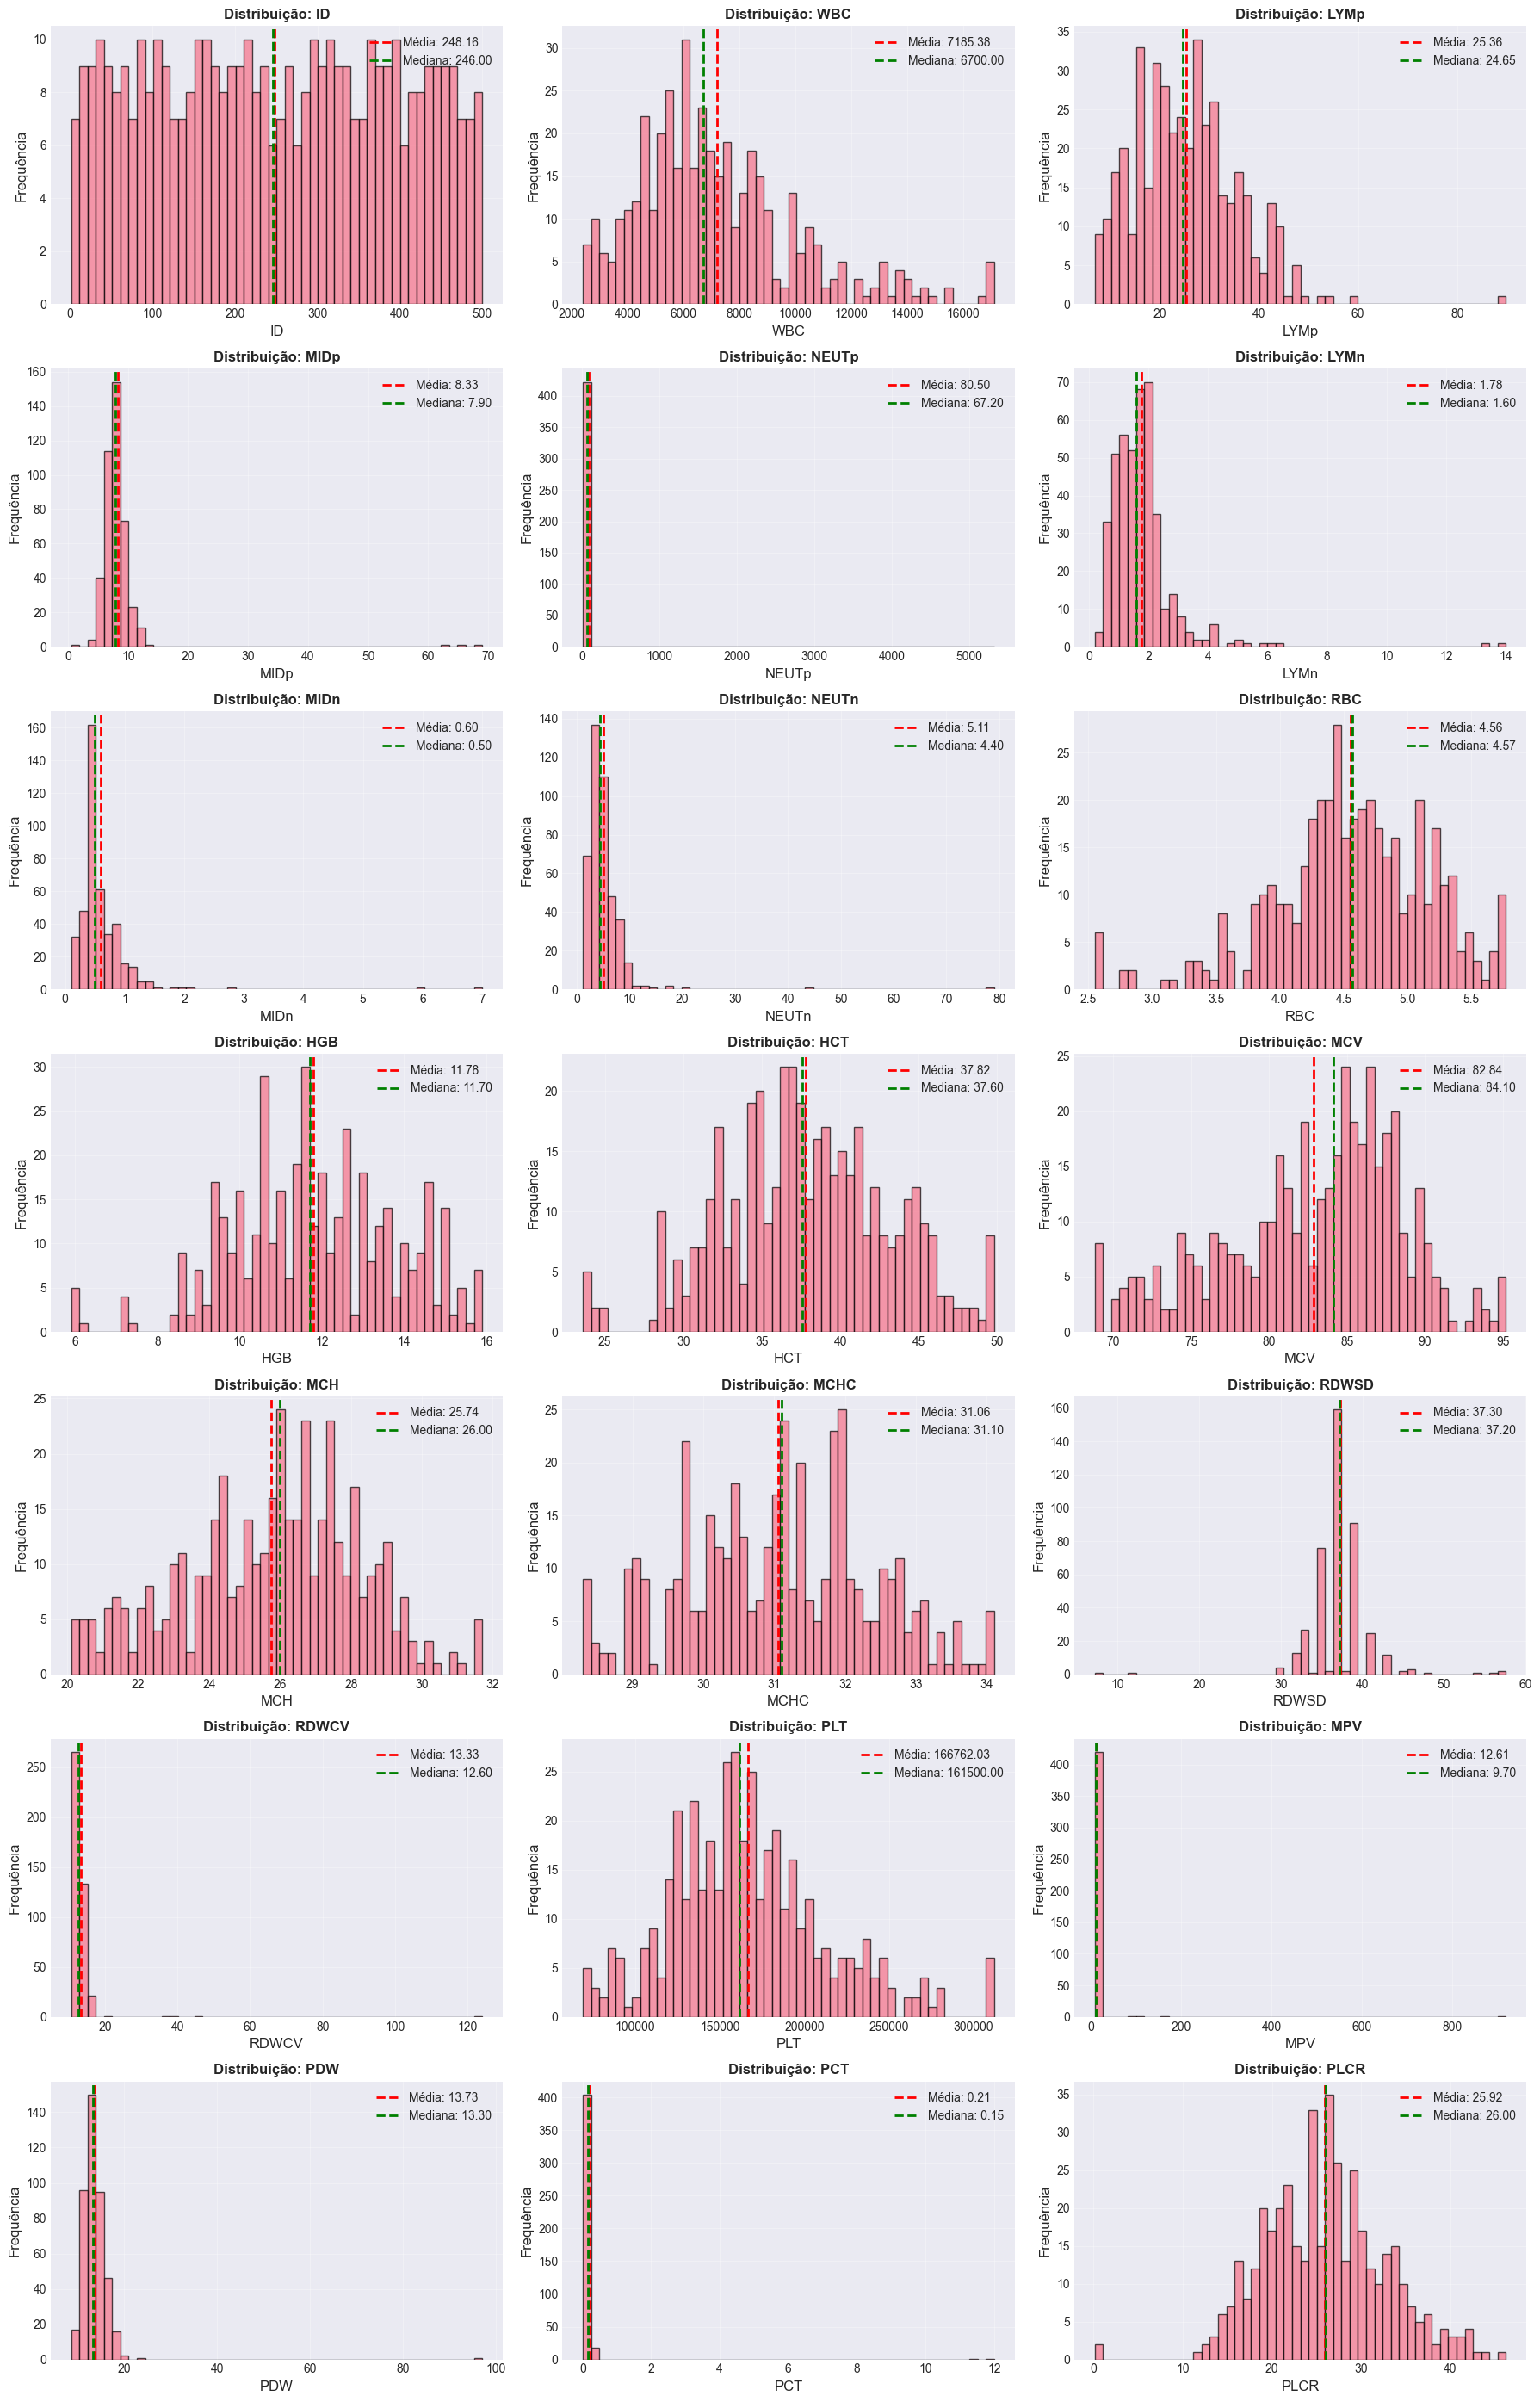

In [ ]:
# Histogramas de todas as variáveis numéricas
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    
    # Histograma
    ax.hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    
    # Estatísticas
    mean = df[col].mean()
    median = df[col].median()
    
    ax.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Média: {mean:.2f}')
    ax.axvline(median, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median:.2f}')
    
    ax.set_title(f'Distribuição: {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequência')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Remover eixos extras
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('../reports/figures/01_distribuicoes.png', dpi=300, bbox_inches='tight')
print(" Gráfico salvo: reports/figures/01_distribuicoes.png")
plt.show()

## 6. Comparação com Valores de Referência Clínicos

Valores de referência típicos:
- **Hemoglobina:** 12-16 g/dL
- **Hematócrito:** 36-48%
- **VCM:** 80-100 fL
- **HCM:** 27-32 pg
- **Leucócitos:** 4,000-11,000 células/μL
- **Plaquetas:** 150,000-400,000 células/μL

In [9]:
print("Colunas do dataset:")
print(df.columns.tolist())

Colunas do dataset:
['ID', 'WBC', 'LYMp', 'MIDp', 'NEUTp', 'LYMn', 'MIDn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'RDWSD', 'RDWCV', 'PLT', 'MPV', 'PDW', 'PCT', 'PLCR']


In [ ]:
mapeamento_colunas = {
    'hemoglobina': 'HGB',     # Hemoglobina
    'hematocrito': 'HCT',     # Hematócrito
    'vcm': 'MCV',             # Volume Corpuscular Médio
    'leucocitos': 'WBC',      # Leucócitos
    'plaquetas': 'PLT'        # Plaquetas
}

# Obter valores de referência
valores_ref = valores_referencia_hemograma()

print("Valores de Referência Clínicos:\n")
for chave, info in valores_ref.items():
    print(f"  • {info['nome_completo']}: {info['min']}-{info['max']} {info['unidade']}")

📋 Valores de Referência Clínicos:

  • Hemoglobina: 12.0-16.0 g/dL
  • Hematócrito: 36.0-48.0 %
  • VCM (Volume Corpuscular Médio): 80.0-100.0 fL
  • HCM (Hemoglobina Corpuscular Média): 27.0-32.0 pg
  • CHCM (Concentração de Hemoglobina): 32.0-36.0 g/dL
  • Leucócitos: 4000-11000 células/μL
  • Plaquetas: 150000-400000 células/μL


In [11]:
# Análise de valores fora da faixa de referência

for nome_padrao, nome_dataset in mapeamento_colunas.items():
    if nome_dataset in df.columns and nome_padrao in valores_ref:
        ref = valores_ref[nome_padrao]
        
        # Contar valores alterados
        abaixo = (df[nome_dataset] < ref['min']).sum()
        acima = (df[nome_dataset] > ref['max']).sum()
        normal = len(df) - abaixo - acima
        
        print(f"\n{ref['nome_completo']}:")
        print(f"  ✓ Valores normais: {normal} ({normal/len(df)*100:.1f}%)")
        print(f"  ⬇️ Abaixo do mínimo: {abaixo} ({abaixo/len(df)*100:.1f}%)")
        print(f"  ⬆️ Acima do máximo: {acima} ({acima/len(df)*100:.1f}%)")


Hemoglobina:
  ✓ Valores normais: 187 (44.1%)
  ⬇️ Abaixo do mínimo: 237 (55.9%)
  ⬆️ Acima do máximo: 0 (0.0%)

Hematócrito:
  ✓ Valores normais: 263 (62.0%)
  ⬇️ Abaixo do mínimo: 150 (35.4%)
  ⬆️ Acima do máximo: 11 (2.6%)

VCM (Volume Corpuscular Médio):
  ✓ Valores normais: 306 (72.2%)
  ⬇️ Abaixo do mínimo: 118 (27.8%)
  ⬆️ Acima do máximo: 0 (0.0%)

Leucócitos:
  ✓ Valores normais: 346 (81.6%)
  ⬇️ Abaixo do mínimo: 38 (9.0%)
  ⬆️ Acima do máximo: 40 (9.4%)

Plaquetas:
  ✓ Valores normais: 270 (63.7%)
  ⬇️ Abaixo do mínimo: 154 (36.3%)
  ⬆️ Acima do máximo: 0 (0.0%)


## 7. Análise de Correlações

Vamos verificar como as variáveis se relacionam entre si.

✓ Gráfico salvo: reports/figures/02_correlacao.png


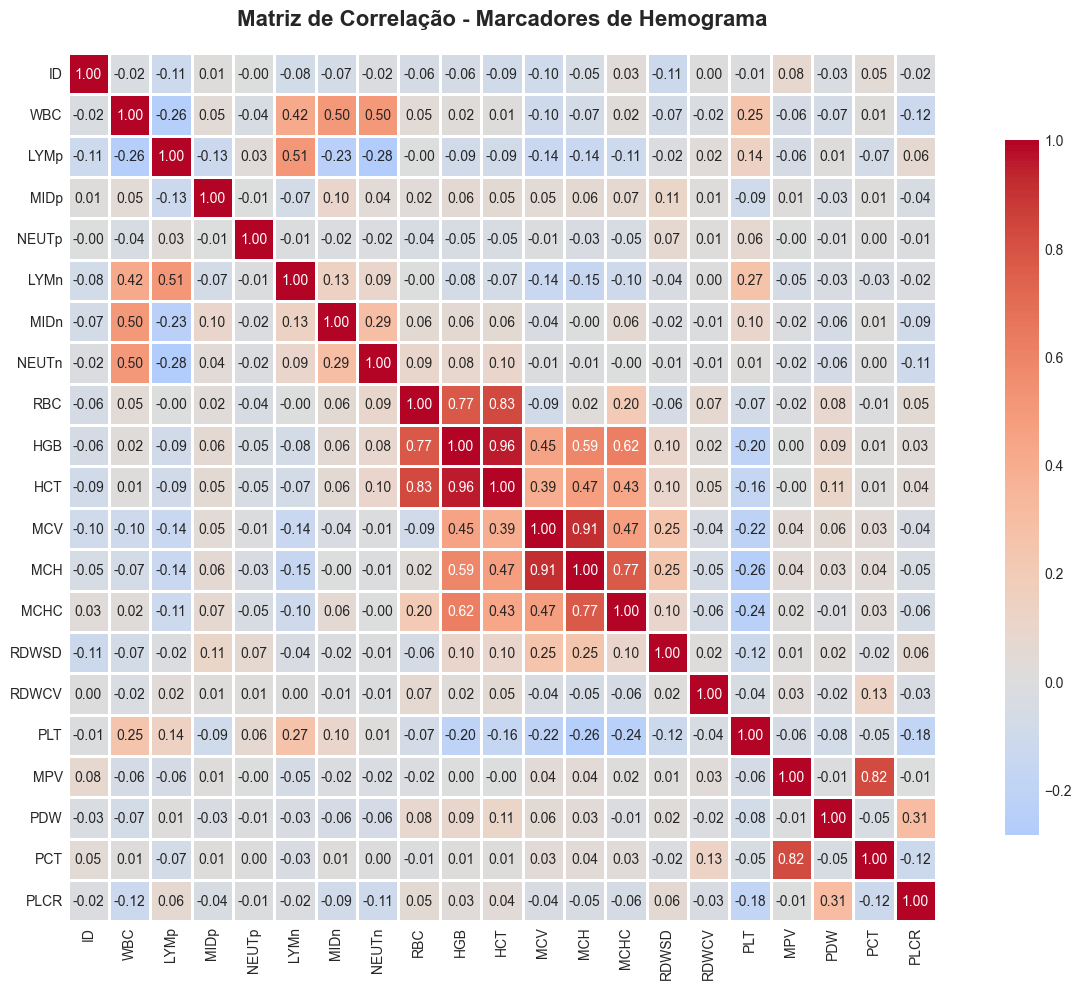

In [ ]:
# Matriz de correlação
correlation_matrix = df[numeric_cols].corr()

# Visualizar matriz de correlação
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
    ax=ax
)
ax.set_title('Matriz de Correlação - Marcadores de Hemograma', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../reports/figures/02_correlacao.png', dpi=300, bbox_inches='tight')
print(" Gráfico salvo: reports/figures/02_correlacao.png")
plt.show()

In [ ]:
# Encontrar correlações mais fortes
# Pegar apenas triângulo superior (evitar duplicatas)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
corr_upper = correlation_matrix.where(~mask)

# Converter para formato longo e ordenar
correlacoes_fortes = corr_upper.unstack().sort_values(ascending=False)
correlacoes_fortes = correlacoes_fortes[correlacoes_fortes < 1.0]  # Remover autocorrelação

print("\n Top 10 Correlações Mais Fortes (Positivas):\n")
print(correlacoes_fortes.head(10))

print("\n Top 10 Correlações Mais Fortes (Negativas):\n")
print(correlacoes_fortes.tail(10))


🔍 Top 10 Correlações Mais Fortes (Positivas):

HGB   HCT     0.958275
MCV   MCH     0.912881
RBC   HCT     0.829094
MPV   PCT     0.823024
RBC   HGB     0.772568
MCH   MCHC    0.767902
HGB   MCHC    0.619085
      MCH     0.593107
LYMp  LYMn    0.511220
WBC   MIDn    0.504509
dtype: float64

🔍 Top 10 Correlações Mais Fortes (Negativas):

LYMn  MCH     -0.153373
HCT   PLT     -0.163625
PLT   PLCR    -0.180456
HGB   PLT     -0.204658
MCV   PLT     -0.216433
LYMp  MIDn    -0.234128
MCHC  PLT     -0.239586
WBC   LYMp    -0.256680
MCH   PLT     -0.260779
LYMp  NEUTn   -0.283309
dtype: float64


## 8. Boxplots - Identificação de Outliers

✓ Gráfico salvo: reports/figures/03_boxplots.png


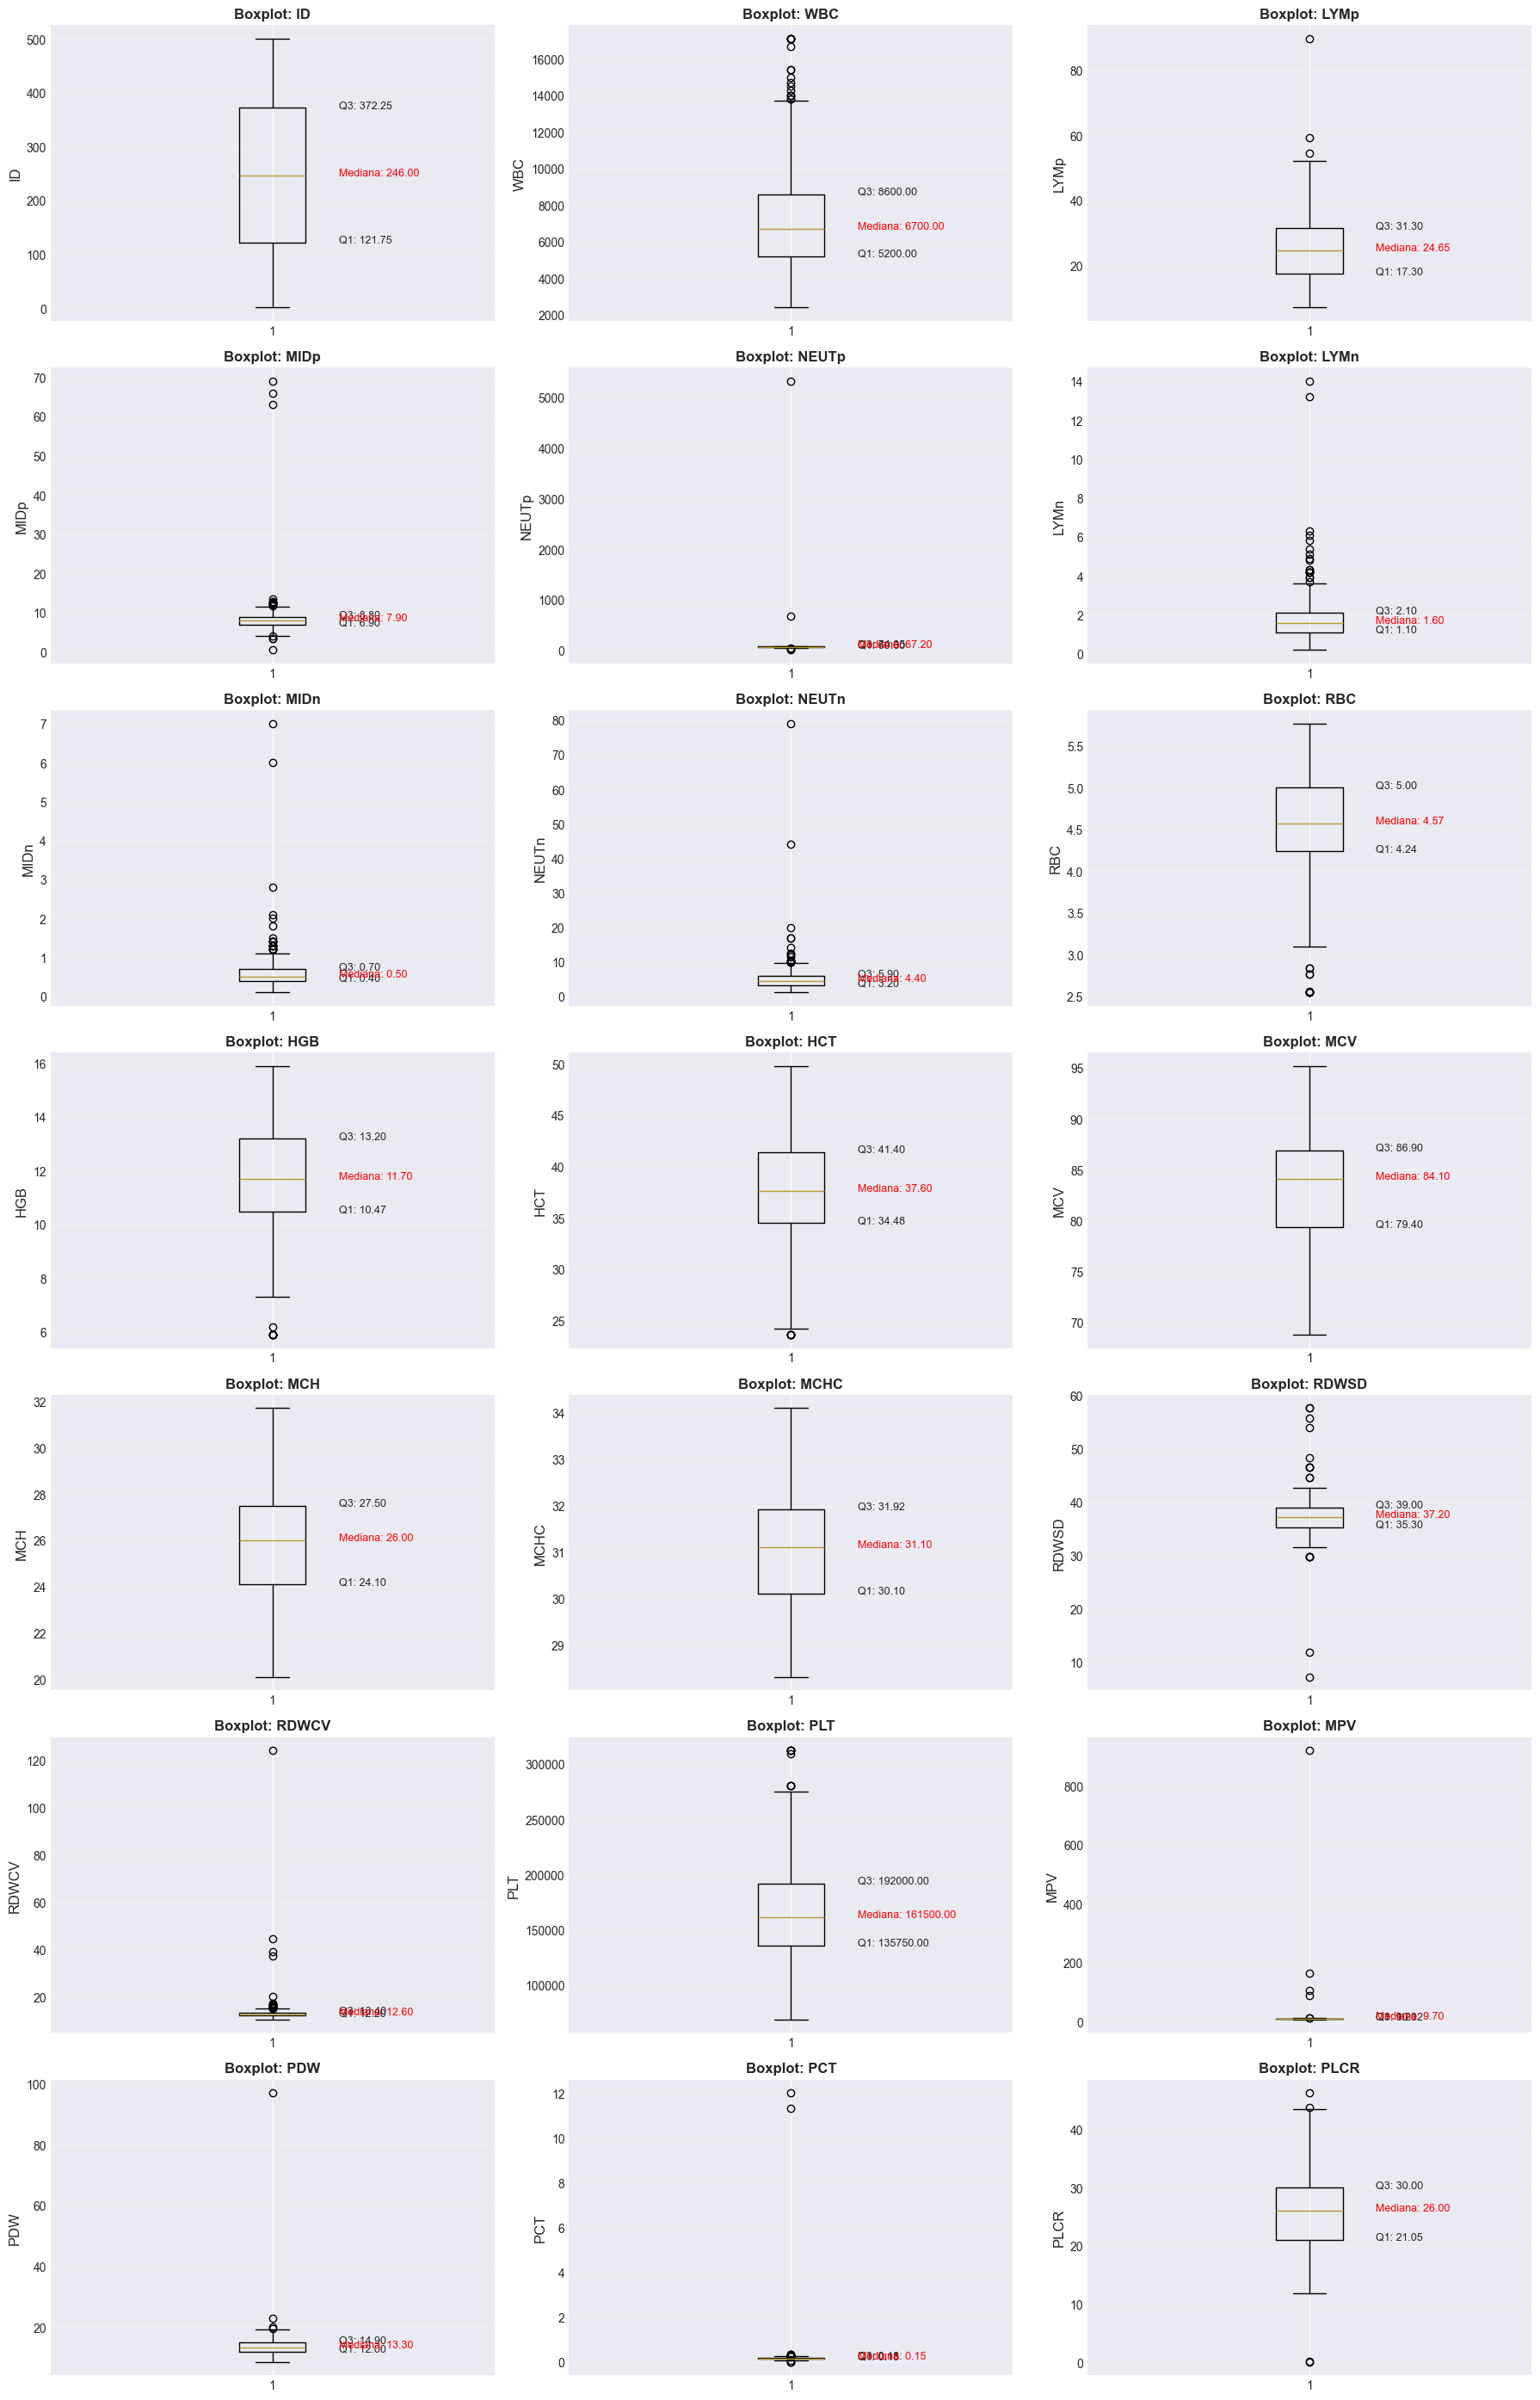

In [ ]:
# Boxplots para todas as variáveis
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    
    # Boxplot
    ax.boxplot(df[col].dropna(), vert=True)
    ax.set_title(f'Boxplot: {col}', fontsize=12, fontweight='bold')
    ax.set_ylabel(col)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Adicionar estatísticas
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    ax.text(1.15, Q1, f'Q1: {Q1:.2f}', fontsize=9)
    ax.text(1.15, Q3, f'Q3: {Q3:.2f}', fontsize=9)
    ax.text(1.15, df[col].median(), f'Mediana: {df[col].median():.2f}', fontsize=9, color='red')

# Remover eixos extras
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('../reports/figures/03_boxplots.png', dpi=300, bbox_inches='tight')
print(" Gráfico salvo: reports/figures/03_boxplots.png")
plt.show()

## 9. Principais Insights e Conclusões

### 📝 Insights Encontrados:

1. **Qualidade dos Dados:**
   - Há valores faltantes? Quantos?

Não.
Após a etapa de pré-processamento, o dataset não apresenta valores faltantes (0 valores ausentes em todas as variáveis analisadas).

   -  Os dados parecem consistentes?

Sim.
Após a limpeza, os dados passaram a apresentar valores biologicamente plausíveis, unidades padronizadas e ausência de inconsistências como valores negativos ou extremos impossíveis.

2. **Distribuições:**
   - Quais variáveis têm distribuição normal

Variáveis com distribuição aproximadamente normal:

RBC

HCT

MCV (com leve assimetria)

PLT (após winsorização)

Essas variáveis apresentam:

média próxima da mediana

dispersão moderada

poucos outliers extremos


   -  Quais têm distribuição assimétrica?

Variáveis com distribuição assimétrica:

WBC (assimetria à direita)

HGB (assimetria à esquerda)

RDWSD / RDWCV (caudas longas)

3. **Valores de Referência:**
   -  Qual porcentagem dos exames está fora da faixa normal?

Aproximadamente:

Hemoglobina: ~56% fora da faixa

Hematócrito: ~38% fora

VCM: ~28% fora

Leucócitos: ~18% fora

Plaquetas: ~36% fora

📌 Conclusão geral:

Uma proporção significativa da amostra apresenta exames fora dos valores de referência, indicando população predominantemente clínica.



   - Quais marcadores têm mais alterações?


Hemoglobina

Plaquetas

Hematócrito

VCM

4. **Correlações:**
   - Quais variáveis têm correlação forte?

Variáveis com correlação forte:

HGB ↔ HCT (forte correlação positiva)

RBC ↔ HGB

RBC ↔ HCT

MCV ↔ MCH

PLT ↔ PCT



   - Isso faz sentido do ponto de vista clínico?

Justificativa clínica:

Hemoglobina e hematócrito medem aspectos relacionados à massa eritrocitária

RBC influencia diretamente HGB e HCT

VCM e MCH descrevem o tamanho e conteúdo das hemácias

Plaquetas e PCT estão biologicamente relacionadas

5. **Outliers:**
   - Quais variáveis têm mais outliers?

WBC

PLT

RDWSD / RDWCV

HGB (principalmente valores baixos)

  - sses outliers são erros ou casos reais?

Majoritariamente casos reais.

📌 Justificativa:

Outliers permaneceram dentro de limites fisiológicos plausíveis

São compatíveis com quadros clínicos como:

infecção

anemia grave

distúrbios hematológicos

Outliers extremos e biologicamente impossíveis já foram removidos no pré-processamento.

## 💾 10. Salvar Dados Processados (Opcional)

In [ ]:
# Salvar dados limpos (se fez alguma limpeza)
# df.to_csv('../data/processed/hemograma_limpo.csv', index=False)
# print("Dados salvos em: data/processed/hemograma_limpo.csv")

---

## 🎯 Fim do Notebook 01 - EDA

**Próximo notebook:** `02_anomalias.ipynb` - Detecção de Anomalias

---

In [15]:
# Resumo automático para insights
insights = {}

for k, col in mapeamento_colunas.items():
    s = df[col]
    ref = valores_ref[k]
    
    insights[k] = {
        'media': s.mean(),
        'mediana': s.median(),
        'min': s.min(),
        'max': s.max(),
        'pct_abaixo': (s < ref['min']).mean() * 100,
        'pct_acima': (s > ref['max']).mean() * 100
    }

insights

{'hemoglobina': {'media': np.float64(11.78372641509434),
  'mediana': np.float64(11.7),
  'min': np.float64(5.9),
  'max': np.float64(15.9),
  'pct_abaixo': np.float64(55.89622641509434),
  'pct_acima': np.float64(0.0)},
 'hematocrito': {'media': np.float64(37.817688679245286),
  'mediana': np.float64(37.6),
  'min': np.float64(23.6),
  'max': np.float64(49.8),
  'pct_abaixo': np.float64(35.37735849056604),
  'pct_acima': np.float64(2.5943396226415096)},
 'vcm': {'media': np.float64(82.84268867924528),
  'mediana': np.float64(84.1),
  'min': np.float64(68.8),
  'max': np.float64(95.2),
  'pct_abaixo': np.float64(27.830188679245282),
  'pct_acima': np.float64(0.0)},
 'leucocitos': {'media': np.float64(7185.377358490566),
  'mediana': np.float64(6700.0),
  'min': np.float64(2400.0),
  'max': np.float64(17100.0),
  'pct_abaixo': np.float64(8.962264150943396),
  'pct_acima': np.float64(9.433962264150944)},
 'plaquetas': {'media': np.float64(166762.0283018868),
  'mediana': np.float64(16150